In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the data
df = pd.read_csv('movieds.csv', encoding='latin1')


In [3]:
# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if needed)
# Example: Drop rows with missing values
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [4]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Extract year from 'Release Date'
df['Release Year'] = df['Release Date'].dt.year

# Drop unnecessary columns
columns_to_drop = ['Day of Week', 'Release Date']
df = df.drop(columns=columns_to_drop)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8396\2805199100.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


In [5]:
# Save the cleaned and transformed data
df.to_csv('cleaned_data.csv', index=False)

In [6]:
# Display the first few rows
print(df.head())
# Display the first few rows of the dataset to get a sense of its structure

# Display summary statistics
print(df.describe())
# Display data types
print(df.dtypes)
# Check for missing values
print(df.isnull().sum())

                  Director   Genre        Movie Title               Studio  \
0                Brad Bird  action       Tomorrowland  Buena Vista Studios   
1              Scott Waugh  action     Need for Speed  Buena Vista Studios   
2           Patrick Hughes  action  The Expendables 3            Lionsgate   
3  Phil Lord, Chris Miller  comedy     21 Jump Street                 Sony   
4          Roland Emmerich  action   White House Down                 Sony   

  Adjusted Gross ($mill)  Budget ($mill) Gross ($mill)  IMDb Rating  \
0                  202.1           170.0         202.1          6.7   
1                  204.2            66.0         203.3          6.6   
2                  207.1           100.0         206.2          6.1   
3                  208.8            42.0         201.6          7.2   
4                  209.7           150.0         205.4          8.0   

   MovieLens Rating Overseas ($mill)  Overseas% Profit ($mill)  Profit%  \
0              3.26          


       Budget ($mill)  IMDb Rating  MovieLens Rating   Overseas%  \
count      608.000000   608.000000        608.000000  608.000000   
mean        92.467928     6.923849          3.340378   57.698849   
std         59.421407     0.925890          0.454071   12.334237   
min          0.600000     3.600000          1.490000   17.200000   
25%         45.000000     6.375000          3.037500   49.900000   
50%         80.000000     6.900000          3.365000   58.200000   
75%        130.000000     7.600000          3.672500   66.300000   
max        300.000000     9.200000          4.500000  100.000000   

            Profit%  Runtime (min)  US ($mill)  Gross % US  Release Year  
count    608.000000     608.000000  608.000000  608.000000    608.000000  
mean     719.278783     117.781250  167.135197   42.301151   2003.960526  
std     1942.807248      23.179122   92.465903   12.334237      9.091431  
min        7.700000      30.000000    0.000000    0.000000   1939.000000  
25%      20

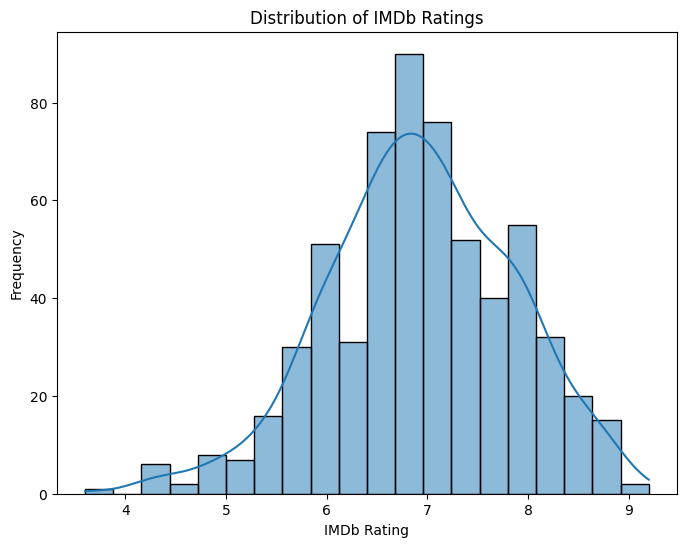

In [7]:

# Histogram of IMDb Rating
plt.figure(figsize=(8, 6))
sns.histplot(df['IMDb Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

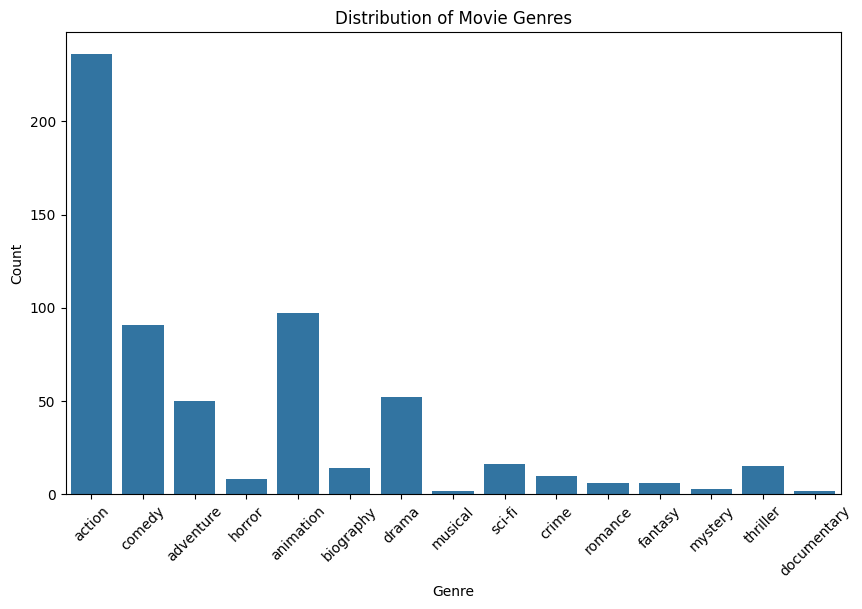

In [8]:
# Count plot of Genre
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Genre'])
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [9]:

# Exclude non-numeric columns from the correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
# Display the correlation matrix
print(correlation_matrix)


                  Budget ($mill)  IMDb Rating  MovieLens Rating  Overseas%  \
Budget ($mill)          1.000000    -0.026303         -0.031066   0.301011   
IMDb Rating            -0.026303     1.000000          0.879836  -0.034393   
MovieLens Rating       -0.031066     0.879836          1.000000  -0.057060   
Overseas%               0.301011    -0.034393         -0.057060   1.000000   
Profit%                -0.298632     0.077253          0.049759  -0.084881   
Runtime (min)           0.218664     0.326788          0.302791   0.086538   
US ($mill)              0.360020     0.304335          0.260240  -0.207146   
Gross % US             -0.301011     0.034393          0.057060  -1.000000   
Release Year            0.459133    -0.105534         -0.097894   0.283021   

                   Profit%  Runtime (min)  US ($mill)  Gross % US  \
Budget ($mill)   -0.298632       0.218664    0.360020   -0.301011   
IMDb Rating       0.077253       0.326788    0.304335    0.034393   
MovieLens Ra

C:\Users\saiki\AppData\Local\Temp\ipykernel_8396\1697001441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=studio_counts.index, y=studio_counts.values, palette='viridis')


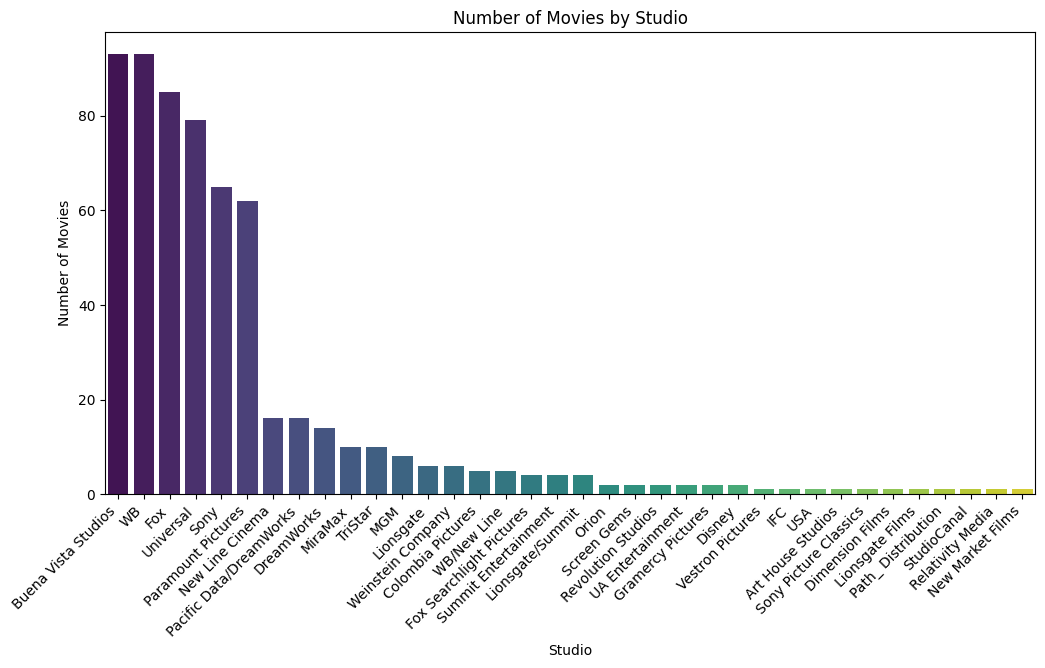

In [10]:
# Count the number of movies for each studio
studio_counts = df['Studio'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=studio_counts.index, y=studio_counts.values, palette='viridis')
plt.title('Number of Movies by Studio')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\saiki\AppData\Local\Temp\ipykernel_8396\1147074434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_year.index,


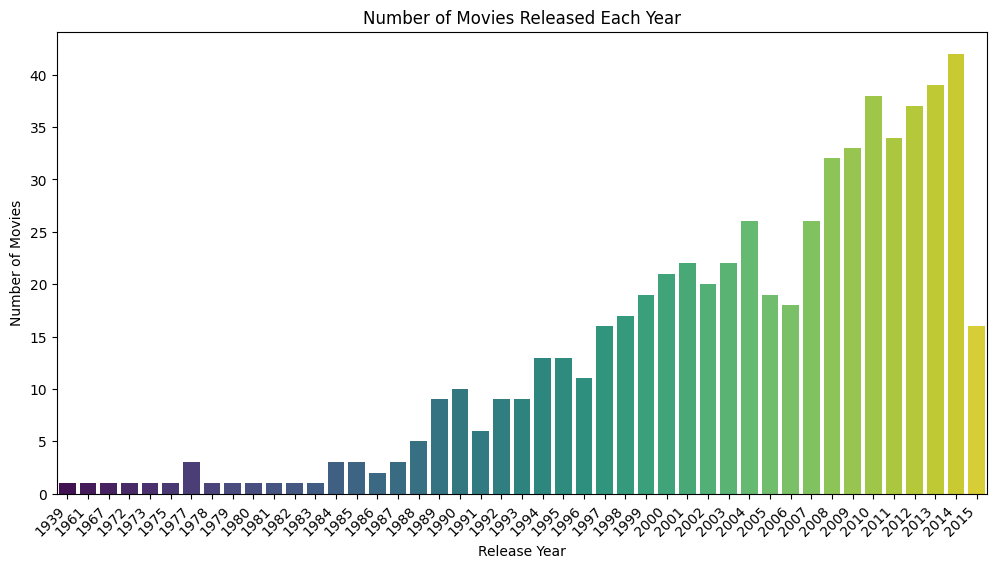

In [11]:
# Count the number of movies released in each year
movies_per_year = df['Release Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index,
            y=movies_per_year.values, palette='viridis')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

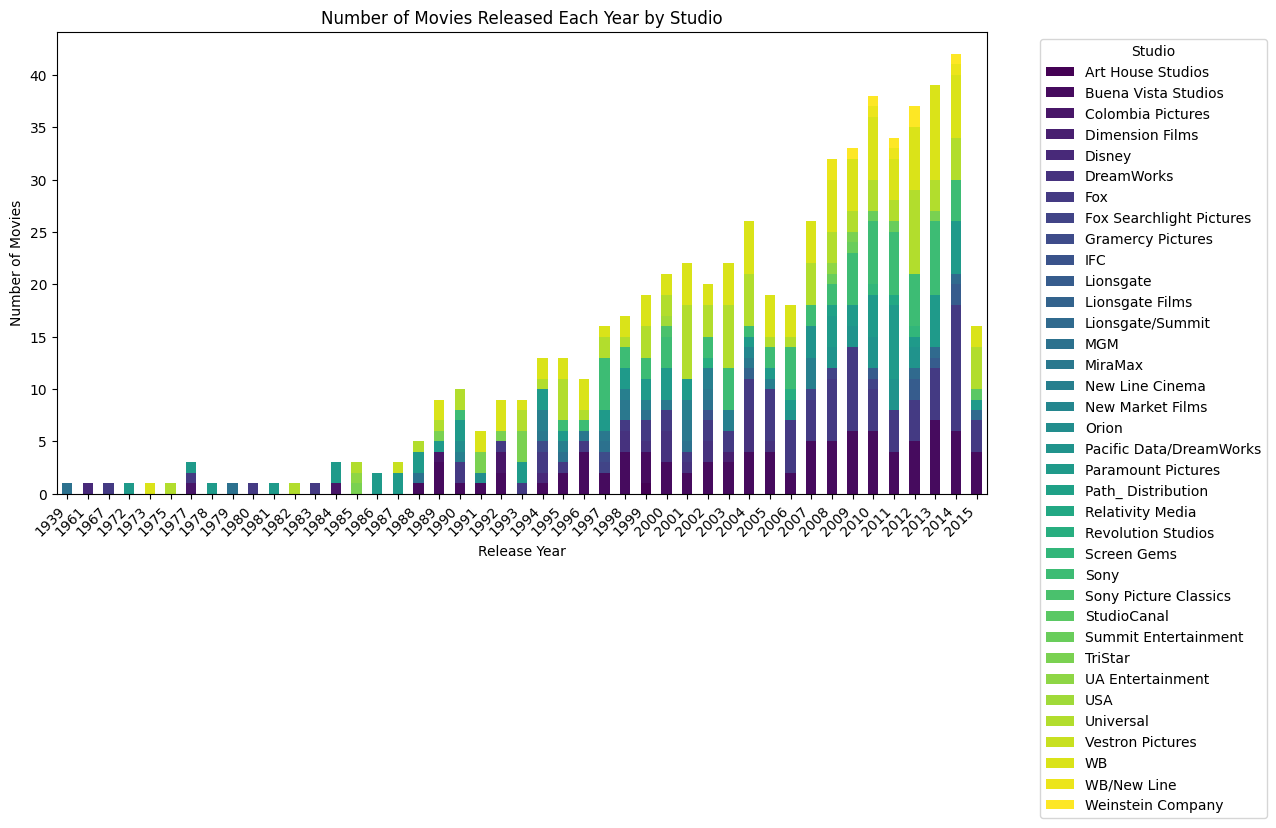

In [12]:
# Count the number of movies released in each year by each studio
movies_per_year_by_studio = df.groupby(
    ['Release Year', 'Studio']).size().unstack(fill_value=0)

# Create a bar plot
plt.figure(figsize=(12, 6))
movies_per_year_by_studio.plot(
    kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Number of Movies Released Each Year by Studio')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\saiki\AppData\Local\Temp\ipykernel_8396\214836770.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_year_by_studio.index, y=movies_per_year_by_studio.values, palette='viridis')


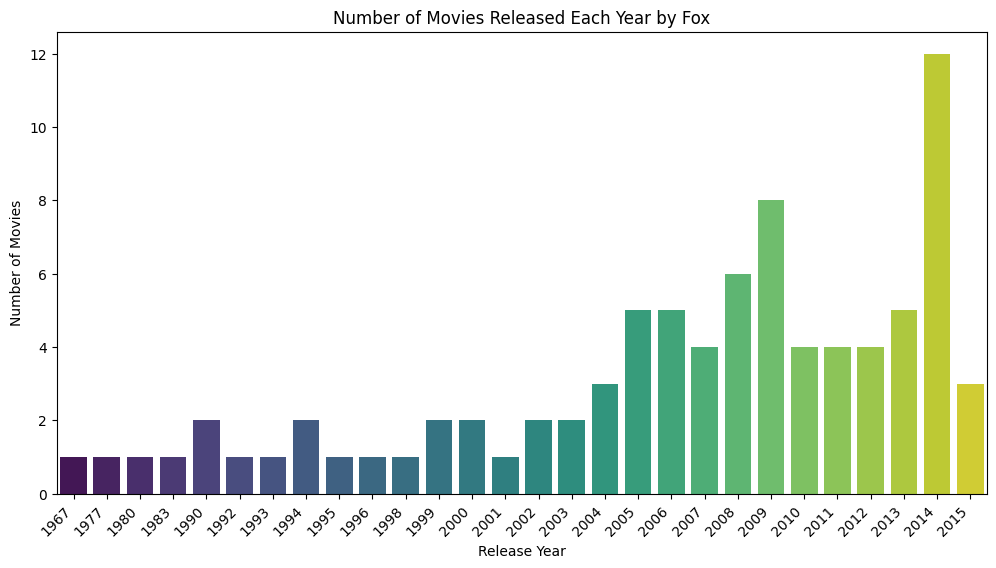

In [13]:
# Take user input for the selected studio
selected_studio = "Fox"

# Filter the data for the selected studio
selected_studio_data = df[df['Studio'] == selected_studio]

# Check if the selected studio exists in the dataset
if selected_studio_data.empty:
    print(f"No data found for {selected_studio}. Please check the studio name.")
else:
    # Count the number of movies released in each year by the selected studio
    movies_per_year_by_studio = selected_studio_data.groupby('Release Year').size()

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=movies_per_year_by_studio.index, y=movies_per_year_by_studio.values, palette='viridis')
    plt.title(f'Number of Movies Released Each Year by {selected_studio}')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Movies')
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')
    plt.show()

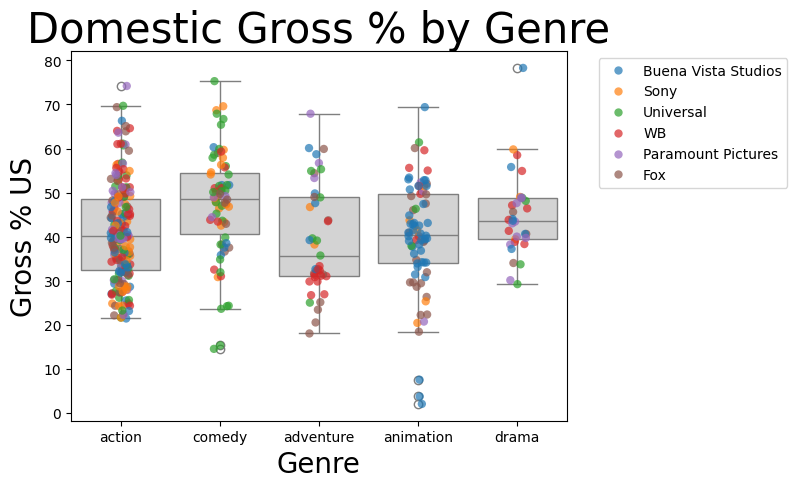

In [14]:
top6_studio=['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
studio_df=df[df.Studio.isin(top6_studio)]

genre_filter =['action','adventure','animation','comedy','drama']
genre_df=studio_df[studio_df.Genre.isin(genre_filter)]
ax=sns.boxplot(data=genre_df,x='Genre',y='Gross % US',orient='v',color='lightgray')
plt.setp(ax.artists,alpha=0.5)
sns.stripplot(x='Genre',y='Gross % US',data=genre_df,hue='Studio',jitter=True,size=6,alpha=0.7)
ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1),loc=2)